# **Banking Customer Churn Prediction Using a Neural Network Approach with Enhanced Class Imbalance Techniques**

### **Problem statement and Exploratory Data Analysis (EDA)**

**Problem Statement:** To predict customer churn in the banking sector by building a neural network model that identifies customers likely to leave within the next six months, optimizing performance through class imbalance techniques for more effective retention strategies (Géron, 2023).

In this following section, we will go through loading of the libraries and dataset, analysis of the overall structure of the dataset, performing univariate, bivariate analyses among others.

In [12]:
# Read the dataset
url = '/content/Bank_Clents.csv'
data = pd.read_csv(url)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [13]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
# Missing values
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None

Missing Values:
 RowNumber          0
CustomerId         0
Surname            0
CreditSc

In [15]:
# Dropping the columns that are not useful for this analysis
data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [16]:
# For categorical variables
le = LabelEncoder()
data['Geography'] = le.fit_transform(data['Geography'])
data['Gender'] = le.fit_transform(data['Gender'])

In [17]:
# Duplicate values
print(f"\nNumber of duplicate rows: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)


Number of duplicate rows: 0


In [18]:
print("\nMissing Values after cleanup:\n", data.isnull().sum())


Missing Values after cleanup:
 RowNumber          0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


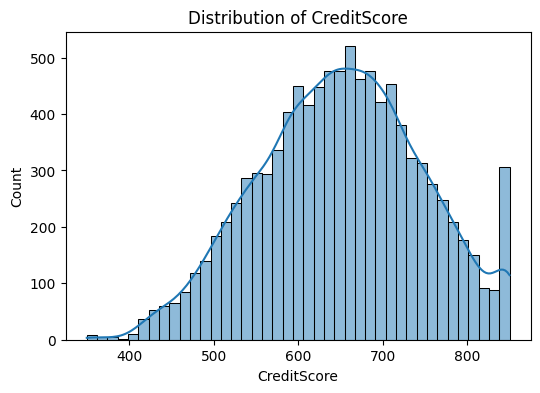

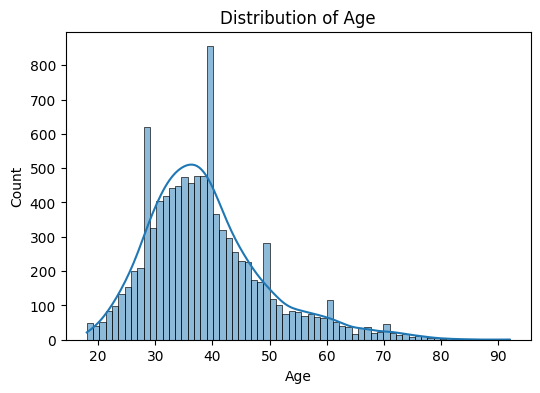

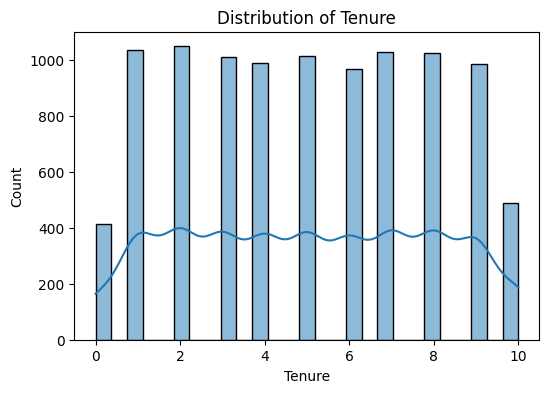

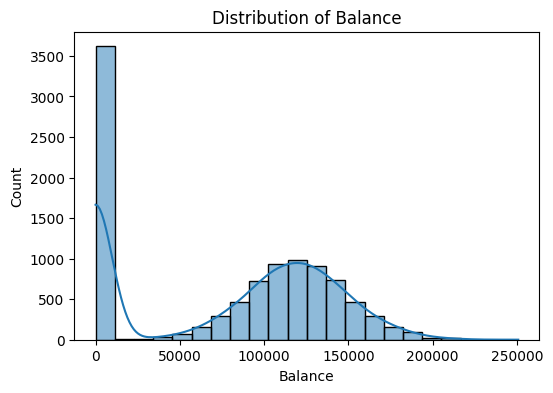

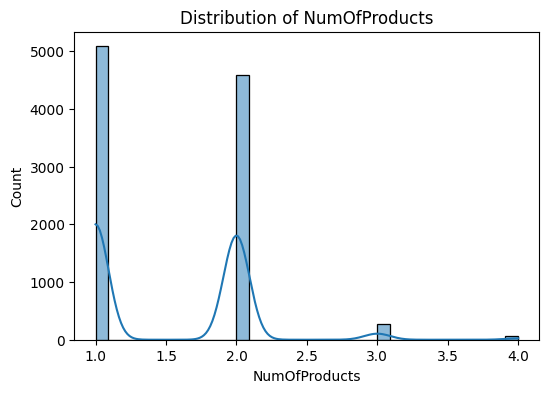

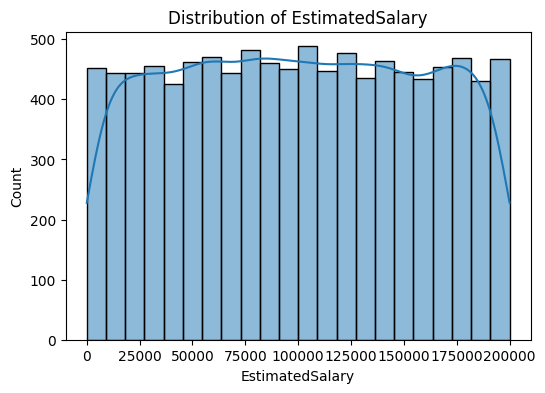

In [19]:
# Univariate analysis
num_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

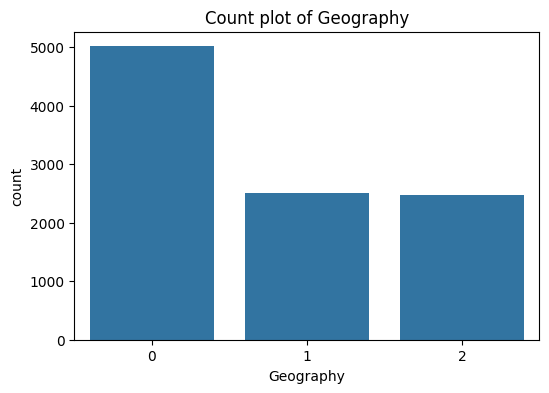

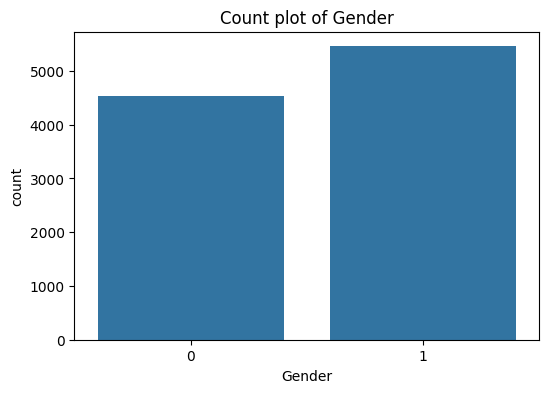

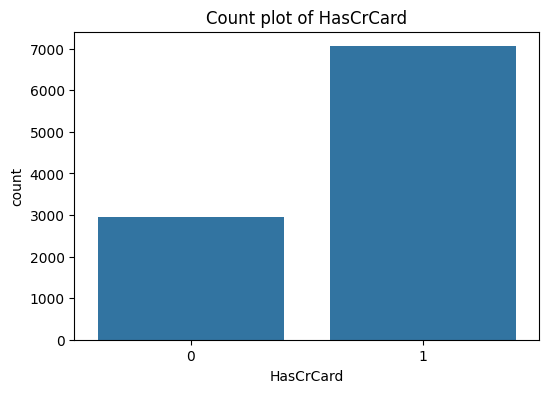

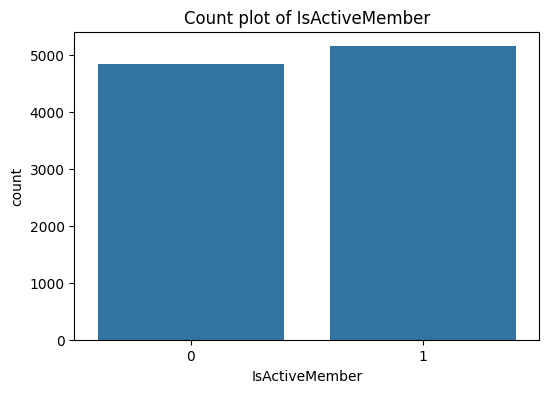

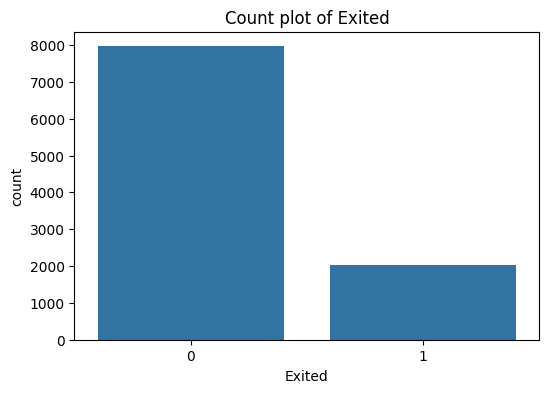

In [20]:
cat_features = [col for col in ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited'] if col in data.columns]

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=data, x=feature)
    plt.title(f'Count plot of {feature}')
    plt.show()

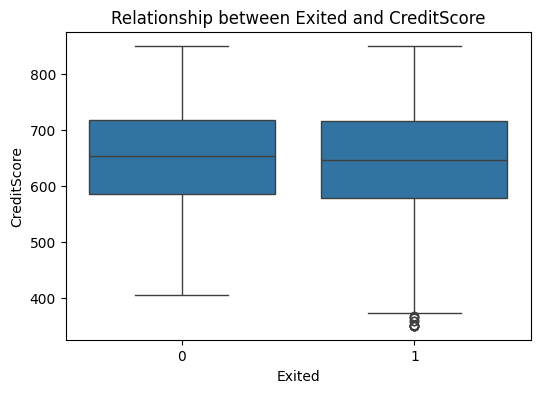

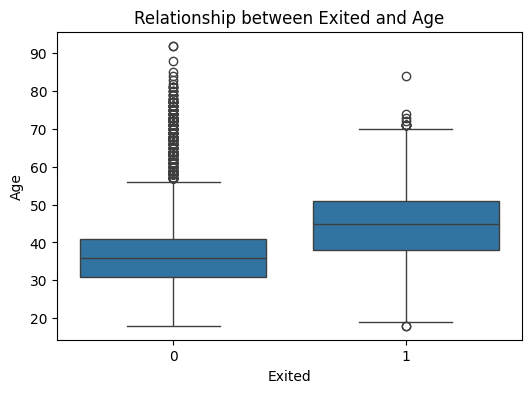

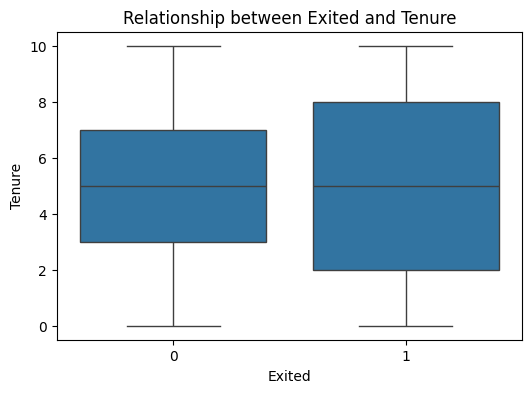

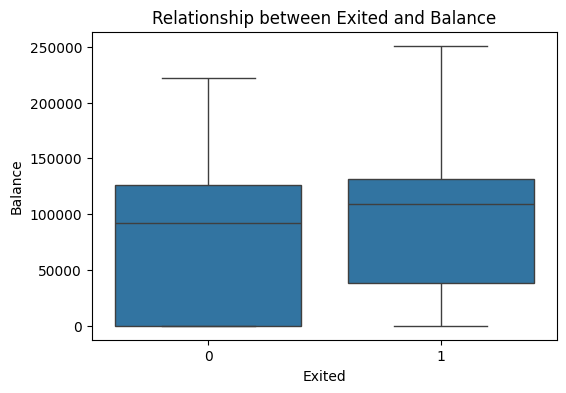

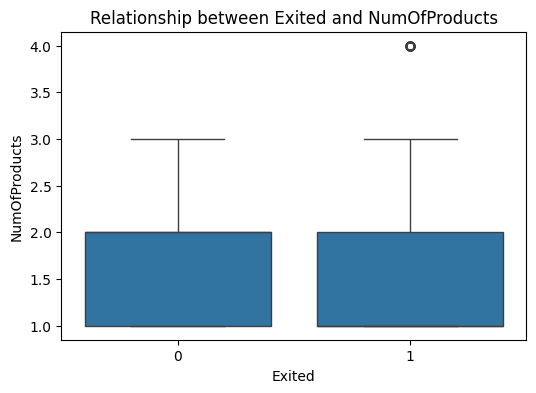

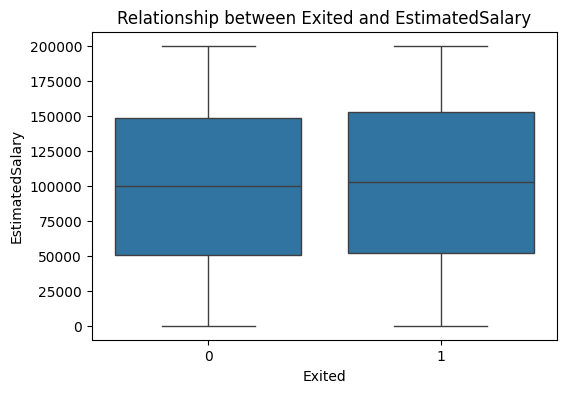

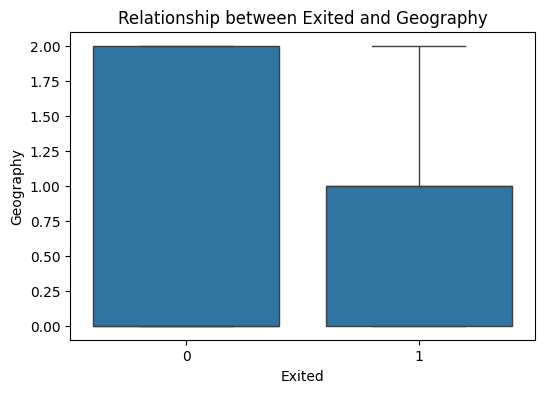

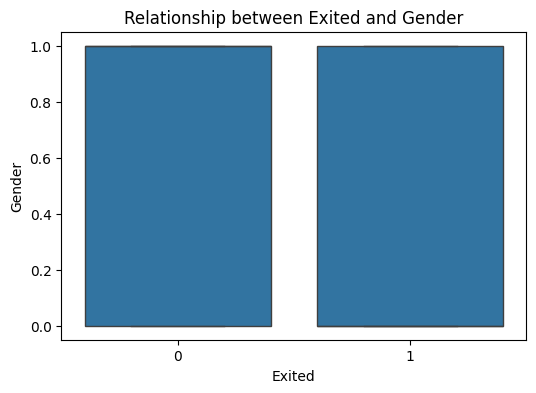

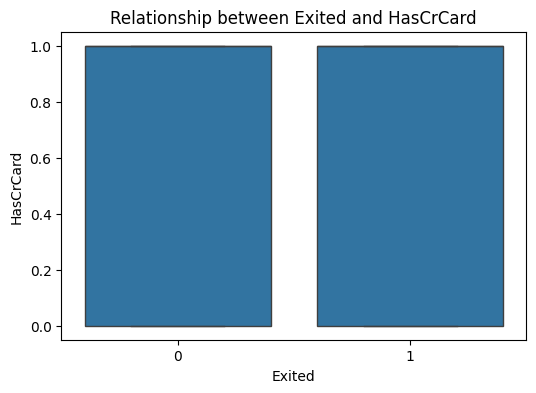

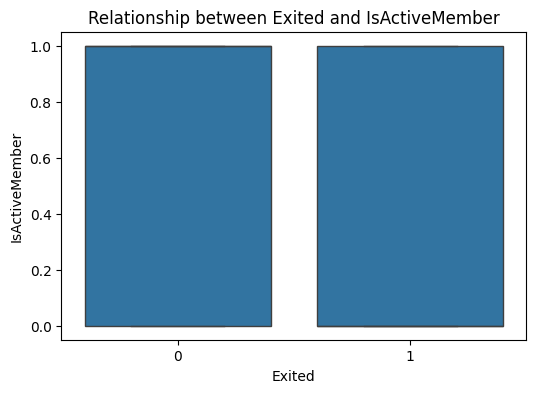

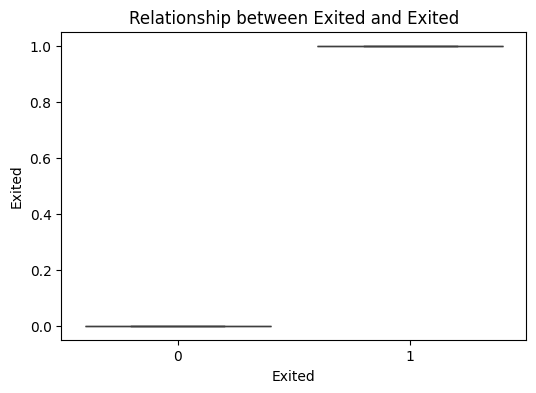

In [21]:
# Bivariate analysis
for feature in num_features + cat_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=data, x='Exited', y=feature)
    plt.title(f'Relationship between Exited and {feature}')
    plt.show()

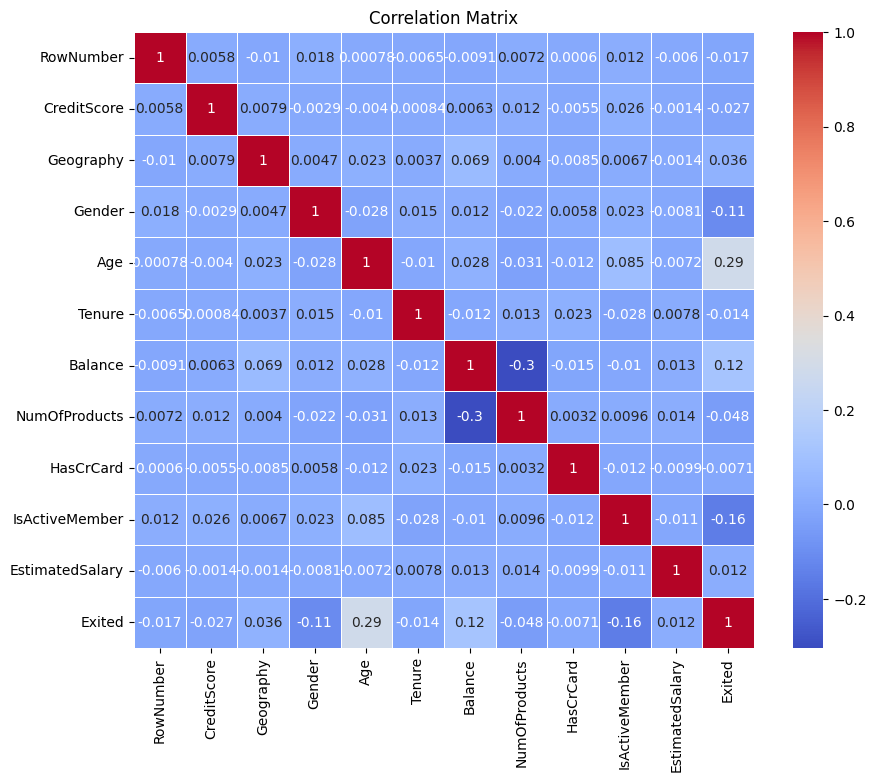

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

### **Data Preprocessing**

This data preparation section includes splitting the target variable, dividing into training and test sets, encoding of categorical features, and normalization of data.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [24]:
# Splitting target variable and predictors
X = data.drop('Exited', axis=1)
y = data['Exited']

# Dividing data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Categorical Encoding
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

In [26]:
# Normalize data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (8000, 11)
Test data shape: (2000, 11)


### **Model Building**

**Comment on which metric to use and why (Accuracy, Precision, Recall, F1).**

For a classification problem like customer churn, where the prediction of a correct class is important, and it is mostly about distinguishing customers who are likely to churn versus those who will stay, the preferred metric will be the F1 Score. The following are the reasons:

* **Accuracy** is a general measure of correct predictions but doesn't work well with class imbalance. Since churn is often less frequent than non-churn, accuracy might give a skewed results by favoring the more common class.
* **Precision** focuses on the proportion of the predicted positives being actual true positives. This helps in reducing the number of false positives.
* While **Recall** views the proportion of true positives against the actual positives to minimize the number of false negatives.
* **F1 Score** balances Precision and Recall into one metric that considers the two mistakes of false positives and false negatives.

Since we have an understanding of both missed churns and false churn predictions are highly valuable, the best metric for use here would be the F1 Score. (Carter & S., 2024)



In [27]:
!pip install tensorflow
!pip install keras

In [28]:
!pip install -U tensorflow scikit-learn

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import f1_score

In [30]:
# Neural network Model
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score on test data: {f1:.2f}")

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7545 - loss: 0.5517 - val_accuracy: 0.8125 - val_loss: 0.4270
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8013 - loss: 0.4508 - val_accuracy: 0.8325 - val_loss: 0.4095
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8209 - loss: 0.4222 - val_accuracy: 0.8413 - val_loss: 0.3986
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8286 - loss: 0.4217 - val_accuracy: 0.8481 - val_loss: 0.3858
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8351 - loss: 0.4040 - val_accuracy: 0.8481 - val_loss: 0.3753
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8446 - loss: 0.3843 - val_accuracy: 0.8469 - val_loss: 0.3667
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.3836 - val_accuracy: 0.8487 - val_loss: 0.3621
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8443 - loss: 0.3793 - val_acc

**Architecture and Representative Diagram Explanation**

Input Layer: 12 features  
&nbsp;&nbsp;&nbsp;&nbsp;|  
&nbsp;&nbsp;&nbsp;&nbsp;v  
Dense Layer (64 neurons, ReLU)  
&nbsp;&nbsp;&nbsp;&nbsp;|  
&nbsp;&nbsp;&nbsp;&nbsp;v  
Dropout (30%)  
&nbsp;&nbsp;&nbsp;&nbsp;|  
&nbsp;&nbsp;&nbsp;&nbsp;v  
Dense Layer (32 neurons, ReLU)  
&nbsp;&nbsp;&nbsp;&nbsp;|  
&nbsp;&nbsp;&nbsp;&nbsp;v  
Dropout (30%)  
&nbsp;&nbsp;&nbsp;&nbsp;|  
&nbsp;&nbsp;&nbsp;&nbsp;v  
Output Layer (1 neuron, Sigmoid)

* **Input Layer:** The input layer takes inputs of features from the dataset and has shapes with input_shape=(X_train.shape), representing the number of features is 12.
* **Hidden Layers:**
  * **First Hidden Layer:** 64 neurons with ReLU activation will help him capture complex relationships of the data provided (Géron, 2023).
  * **Dropout Layer:** 30% dropout is conducted to reduce overfitting.
  * **Second Hidden Layer:** 32 neurons with ReLU activation, keeping additional depth without over-complicating.
  * **Dropout Layer:** Another 30% dropout for further regularization (Carter & S. 2024).
* **Output Layer:** The architecture should include one neuron, using the sigmoid function for binary classification - churn vs. non-churn.

The architecture will make a trade-off because it learns enough about the data pattern without developing an overly complicated model that may tend to overfit in a limited dataset (Géron, 2023; Wilber, 2023).

### **Model Performance Evaluation**

**Comment on the model’s performance.**

After training the first neural network model, we are able to tell how much the F1 Score is on the test set. It gives us an idea of how well the model has been performing while at the same time allowing for the inclusion of two other metrics-accuracy and loss.

F1 Score provides a better balance between precision and recall, therefore, it would be useful in finding out how well the model has performed in effectively classifying customers as either churned or not (Brownlee, 2022).

If the F1 Score and accuracy are lower than expected, then this may mean that the model fails to distinguish optimally between the customers who have churned and those who have not. This may be due to reasons such as a few numbers of hidden layers, too little regularization, or bad hyperparameters (Géron, 2023).

**Can Its Performance Be Enhanced?**

Well, this model may be enhanced in many ways:
* by adding more layers or neurons. While a much deeper network can capture more intricate patterns, it makes the risk of overfitting turn harsh (Wilber, 2023).
* Modifying dropout rates would also be important to avoid overfitting without influencing the model's learning ability on the data (GeeksforGeeks, 2024).
* Applying batch normalization-smoothing out the input for each layer will result in greater stability and speed up the process (Carter & S., 2024).
* ***Hyperparameter Tuning:*** Trying different learning rates, batch sizes, and optimizers could lead to better training dynamics.
* ***Class Imbalance Handling:*** In case the churn happens more rarely, class weighting or oversampling of the churn class could bring the model toward the minority class (Brownlee, 2022).

**Building Improved Models**

To improve the model’s performance, we will try the following architectures incrementally. Each improvement will be tested, and the best-performing model will be chosen as the final one. The following are the models that were decided to compare with the initial neural network model:
* Model 1: Increased Model Complexity (Géron, 2023).
* Model 2: Adding Batch Normalization (Wilber, 2023; Carter & S., 2024).



In [37]:
# Model 1: Increased Model Complexity
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dropout(0.4))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

y_pred_prob1 = model1.predict(X_test)
y_pred1 = (y_pred_prob1 > 0.5).astype("int32")
f1_model1 = f1_score(y_test, y_pred1)
print(f"F1 Score of Model 1: {f1_model1:.2f}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.7623 - loss: 0.5399 - val_accuracy: 0.8225 - val_loss: 0.4287
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8014 - loss: 0.4587 - val_accuracy: 0.8413 - val_loss: 0.4057
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8171 - loss: 0.4252 - val_accuracy: 0.8444 - val_loss: 0.3877
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8241 - loss: 0.4131 - val_accuracy: 0.8400 - val_loss: 0.3770
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8285 - loss: 0.4128 - val_accuracy: 0.8419 - val_loss: 0.3645
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
F1 Score of Model 1: 0.22


In [38]:
from tensorflow.keras.layers import BatchNormalization

# Model 2: Adding Batch Normalization
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.4))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping], verbose=1)

y_pred_prob2 = model2.predict(X_test)
y_pred2 = (y_pred_prob2 > 0.5).astype("int32")
f1_model2 = f1_score(y_test, y_pred2)
print(f"F1 Score of Model 2: {f1_model2:.2f}")

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7336 - loss: 0.5795 - val_accuracy: 0.8194 - val_loss: 0.4171
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7933 - loss: 0.4648 - val_accuracy: 0.8413 - val_loss: 0.3884
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8019 - loss: 0.4517 - val_accuracy: 0.8431 - val_loss: 0.3716
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8093 - loss: 0.4252 - val_accuracy: 0.8381 - val_loss: 0.3697
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8255 - loss: 0.4123 - val_accuracy: 0.8519 - val_loss: 0.3605
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
F1 Score of Model 2: 0.23


In [39]:
print("\nComparison of F1 Scores:")
print(f"Initial Model F1 Score: {f1:.2f}")
print(f"Model 1 (Increased Complexity) F1 Score: {f1_model1:.2f}")
print(f"Model 2 (Batch Normalization) F1 Score: {f1_model2:.2f}")


Comparison of F1 Scores:
Initial Model F1 Score: 0.52
Model 1 (Increased Complexity) F1 Score: 0.22
Model 2 (Batch Normalization) F1 Score: 0.23


As observed from the F1 Scores obtained when comparing the models, the Initial Model presents the best and most optimal model, since it resulted in the highest F1 Score of 0.52 against Model 1, which was 0.22, and Model 2, which was 0.23.

Reasons why the Initial Model performed better includes:

* Sometimes simple models generalize better on the test set when the dataset is not big enough to allow deeper architectures to generalize (GeeksforGeeks, 2024).
* **Overfitting in Complex Models:** Additional added layers and complexity in Model 1 and Model 2 could have resulted in overfitting and therefore poor performance on the test set.
* **Initial Configuration Suitability:** The two hidden layers configuration with moderate neurons and dropout was enough to model relevant patterns without over-complicating the learning process of the neural network (Géron, 2023).

**Conclusion**

The best model is the initial model, that presents an F1 score of 0.52. Possible future steps would go for further tunning of hyperparameters of this simpler architecture either on learning rate, batch size, or dropout rates.







### **Proposal for actionable insights and recommendations**

1. **Target Middle-Aged Customers**

  * **Insight**: A great proportion of customers within the bank are within the age bracket of 40 years. People within such an age have very clear goals about their financial situations, such as retirement savings or investments to meet the family's needs (Géron, 2023).

  * **Recommendation**: Design products for middle-aged clients to cater to their requirements, for example, retirement accounts, family health insurance, or mortgage support. They are then able to achieve their unique financial objectives while building brand loyalty in that process.
2. **Improvement of Services in Key Areas**
  
  * **Insight**: Most the customers attention is on only one key area. This shows markets within that region are considerably commanding, thus critical to the company's activities.

  * **Recommendation**: In this major area, focus on the enhancement of services and consumer care for the retention of customers, along with attracting new ones. Marketing strategies should be designed for less represented areas to gain more consumers by promoting brand recognition.

3. **Increase Multiple Product Usage**
  
  * **Insight**: Most customers own just one or two bank products, which leads to a constrained customer involvement and bank income (Brownlee, 2022).

  * **Recommendation**: Create bundles or discounts that will encourage customers to try more products. Give them reduced fees when they add a credit card or some type of savings account. Such a strategy can make the relationships with customers even deeper and increase overall engagement with the bank.

4. **Re-Engage Inactive Customers**

  * **Insight**: Almost half of the customers are not using their accounts actively, and might lead to churn, says GeeksforGeeks in 2024.

  * **Recommendation**: Reach out to lapsed customers with personalized messages, reminding them how good their accounts are, and try to make special offers. This would encourage their active use again and lower the possibility of losing them.

5. **Encourage Customers to Maintain Balances**

  * **Insight**: Most of the customers maintain a zero balance, which shows they do not even consider this bank for saving purposes (Wilber, 2023).

  * **Recommendations**: This can be advised by the introduction of minimum balance requirements in the form of higher interest rates or a waiver of fees. These types of saving incentives with the bank encourage the customer to contribute to a stable deposit base that is beneficial for both customers and banks.

6. **Adaptation of Services According to Income**

  * **Insight**: The customer base is segregated based on income level, and therefore not all customers need to fit into one category.

  * **Recommendation**: Provide services depending on individual incomes. For instance, high-income customers should be treated to higher class services and vice-versa. The customization of a service provided can create the feeling of importance from the clients and even increase loyalty.

7. **Wide Retention Strategy**

  * **Insight**: Even though the majority of customers stay with the bank, many leave. No one factor that is predictive by age or account activity can clearly show why they leave, so a broad approach is most appropriate.

  * **Recommendations**: It is desirable that there be a general retention program which should be utilized for rewarding loyalty, checking on customer satisfaction from time to time, and also extending certain fringe benefits to customers who have stayed with the bank for some time. Particular attention being devoted to those who can easily turn defectors, such as low-balance or less active customers who need some incentives to keep them active.

**Conclusion**

It would add to the customer's satisfaction and loyalty if the bank paid more attention to the customers' needs and highlighted a good retention strategy. Also the bank need to focus on age-specific product delivery, service enhancement in strategic regions, increasing product utilization, member reactivation, and design services by income. Customer loyalty will require a complete understanding to retention as no one element explained the reasons for customer churning.

**References**

1. Brownlee, J. (2022, August 6). Multi-class classification tutorial with the Keras Deep Learning Library. MachineLearningMastery.com. https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

2. Carter, D. S. and S. (2024). Tensorflow - Neural Network Playground. A Neural Network Playground. https://playground.tensorflow.org/  

3. GeeksforGeeks. (2024, June 20). Feedforward Neural Network. https://www.geeksforgeeks.org/feedforward-neural-network/

4. Géron, A. (2023). Hands-on machine learning with scikit-learn, keras and tensorflow: Concepts, tools, and techniques to build Intelligent Systems. O’Reilly Media, Inc.

5. Wilber, J. (2023). Neural networks. MLU. https://mlu-explain.github.io/neural-networks/